Populating the interactive namespace from numpy and matplotlib
typeCode:  1
typeSize:  4
shape:  (1, 1001, 1201)
numOfArrays:  342
shape:  (342, 1001, 1201)
Max E:  1.1777157


/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


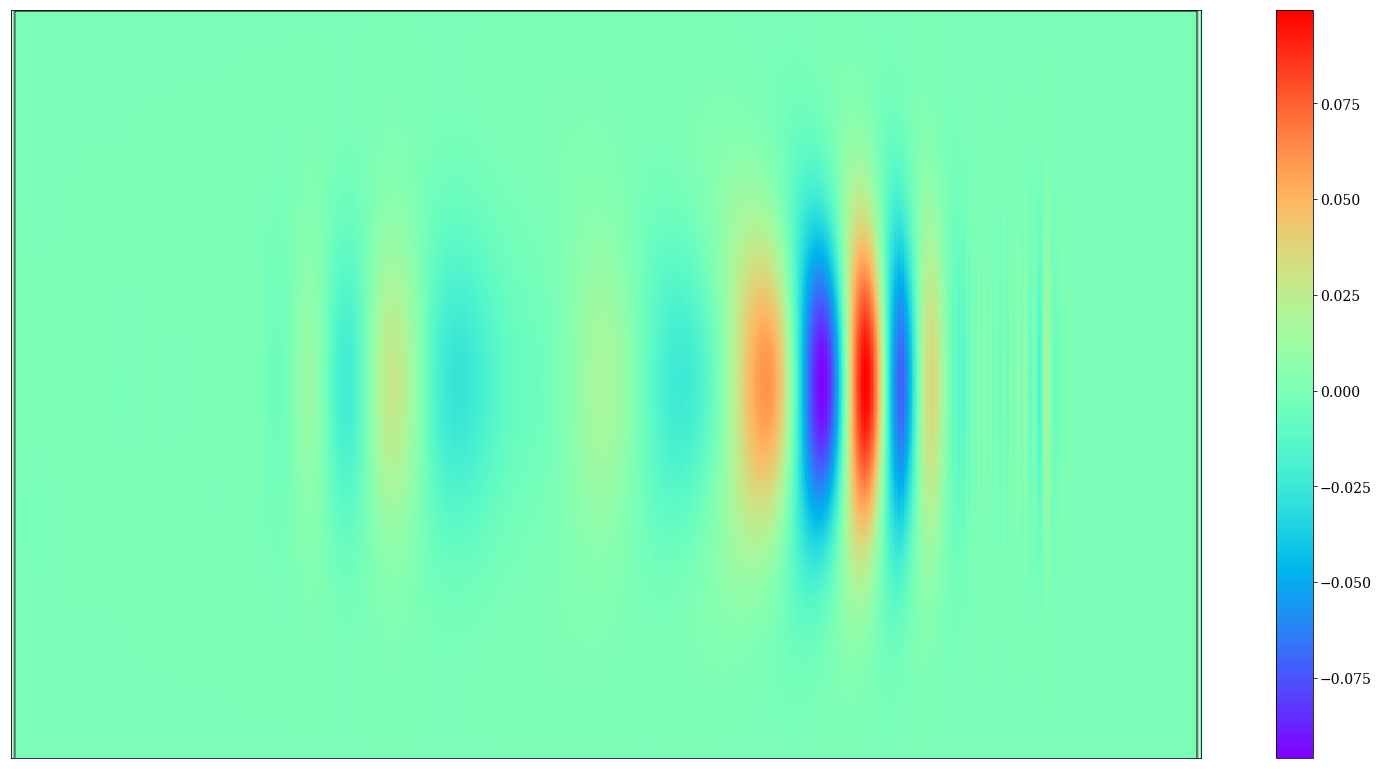

In [31]:
## animate Electric field  

%pylab tk
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from ReadBinary import *

font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)

fileSuffix = "-0"
#folder = "../data/LargePeriodicLattice-GaussianPlasma/fp=1THz/"
folder = "../data/2D/"

filename_E = folder+"E-x{}.data".format(fileSuffix)
filename_Wp2 = folder+"Wp2-x{}.data".format(fileSuffix)
arrayInfo = GetArrayInfo(filename_E)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

E = GetArrays(filename_E, indStart=0, indEnd=None)[:, 0, :, :]
Wp2 = GetArrays(filename_Wp2, indStart=0, indEnd=None)[:, 0, :, :]
print("shape: ", E.shape)

assert E.shape == Wp2.shape

shape = E.shape[1:]
print("Max E: ", np.max(np.abs(E)))

animate = True
save_animation = False

if animate:
    def animate_E(n):
        plt.clf()
        fig = plt.imshow(np.real(E[n, :,:]), cmap="rainbow", origin='lower', aspect='auto')
        plt.colorbar()
        plt.contour(np.real(Wp2[n, :,:]), cmap="Greys", linewidths=0.5)
        plt.xticks([])
        plt.yticks([])
        plt.pause(0.05)
        
        return fig
    
    if not save_animation:
        plt.ion()
        plt.figure(figsize=(7,6*(shape[0]/shape[1])))

        for n in range(E.shape[0]):
            animate_E(n)
    else:
        fig = plt.figure(figsize=(7,6*(shape[0]/shape[1])))
        anim = animation.FuncAnimation(fig, animate_E, frames=E.shape[0], interval=1, repeat=False)
        anim.save(folder + 'Efield-anim.mp4', writer="ffmpeg", fps=15, dpi=200)


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


shape:  (3405, 1001, 1)


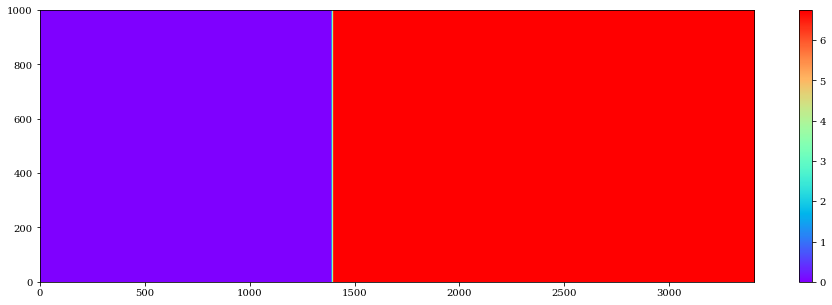

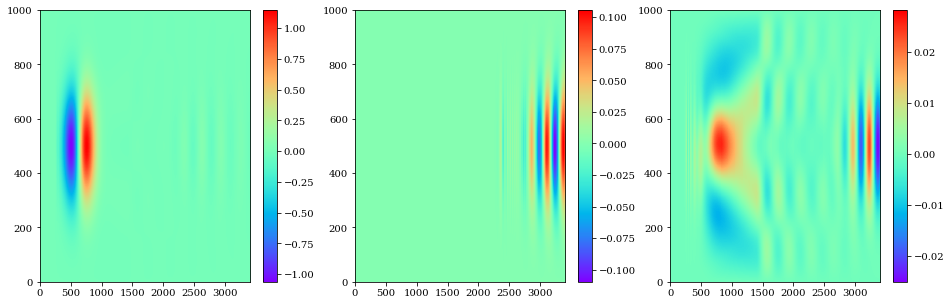

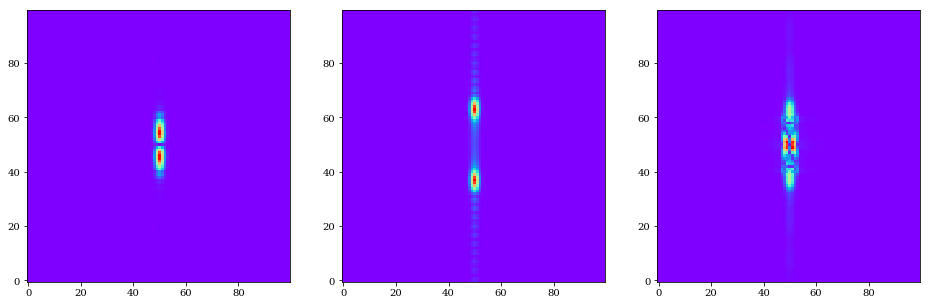

In [32]:
%pylab inline

figsize(16, 5)

wp2 = GetArrays(folder+"Wp2-slice-x{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Ei = GetArrays(folder+"Ei-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Et = GetArrays(folder+"Et-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Er = GetArrays(folder+"Er-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
print("shape: ", Et.shape)

shape = Et.shape[1:]
wp2_ty = wp2[:, :, 0]
Ei_ty = Ei[:, :, 0]
Et_ty = Et[:, :, 0]
Er_ty = Er[:, :, 0]

plt.imshow(np.real(wp2_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()

plt.subplot(131)
plt.imshow(np.real(Ei_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.subplot(132)
plt.imshow(np.real(Et_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.subplot(133)
plt.imshow(np.real(Er_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()

Nt, Ny = Et_ty.shape
N_pts = 50
Ei_f_ty = np.fft.fftshift(np.fft.fft2(Ei_ty))[Nt//2-N_pts:Nt//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]
Et_f_ty = np.fft.fftshift(np.fft.fft2(Et_ty))[Nt//2-N_pts:Nt//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]
Er_f_ty = np.fft.fftshift(np.fft.fft2(Er_ty))[Nt//2-N_pts:Nt//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]

plt.subplot(131)
plt.imshow(np.abs(Ei_f_ty), cmap="rainbow", origin='lower', aspect='auto')
plt.subplot(132)
plt.imshow(np.abs(Et_f_ty), cmap="rainbow", origin='lower', aspect='auto')
plt.subplot(133)
plt.imshow(np.abs(Er_f_ty), cmap="rainbow", origin='lower', aspect='auto')
plt.show()


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


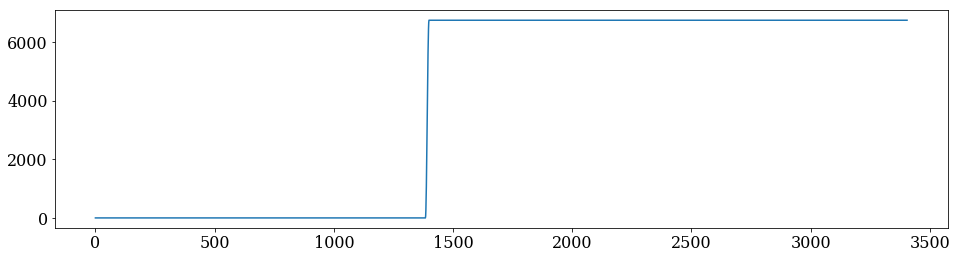

ind_switch :  1399


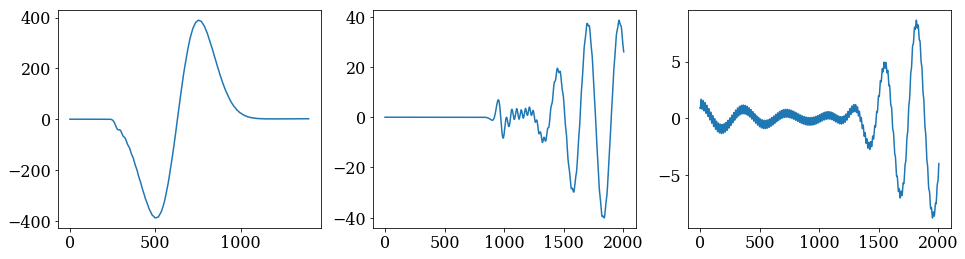

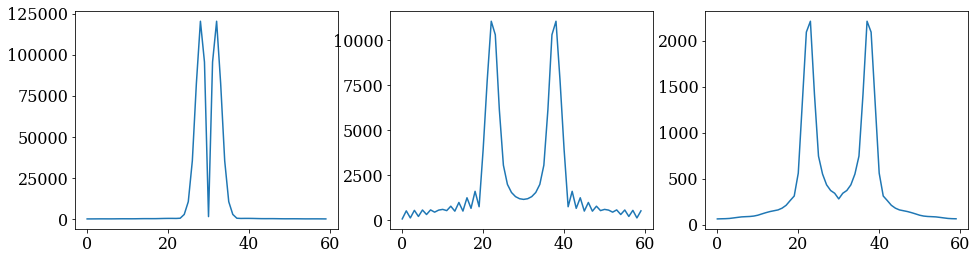

In [33]:
%pylab inline

font = {'family' : 'serif', 'weight' : 'normal', 'size' : 16}
matplotlib.rc('font', **font)

figsize(16, 4)


wp2_t = np.sum(wp2_ty, axis=1)#[600:650]
plt.plot(wp2_t)
plt.show()

ind_switch = np.argmax(wp2_t)

print("ind_switch : ", ind_switch)

plt.subplot(131)
Ei_t = np.sum(Ei_ty, axis=1)[:ind_switch]
plt.plot(Ei_t)
plt.subplot(132)
Et_t = np.sum(Et_ty, axis=1)[ind_switch:]
plt.plot(Et_t)
plt.subplot(133)
Er_t = np.sum(Er_ty, axis=1)[ind_switch:]
plt.plot(Er_t)
plt.show()

N_pts = 30

Nt = len(Ei_t)
plt.subplot(131)
Ei_f_t = np.fft.fftshift(np.fft.fft(Ei_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(Ei_f_t))
Nt = len(Et_t)
plt.subplot(132)
Et_f_t = np.fft.fftshift(np.fft.fft(Et_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(Et_f_t))
plt.subplot(133)
Er_f_t = np.fft.fftshift(np.fft.fft(Er_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(Er_f_t))
plt.show()


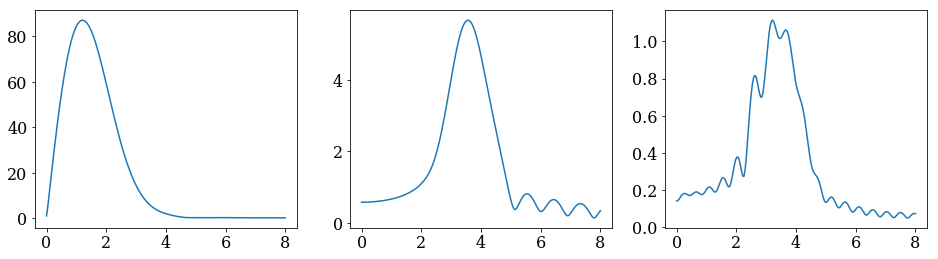

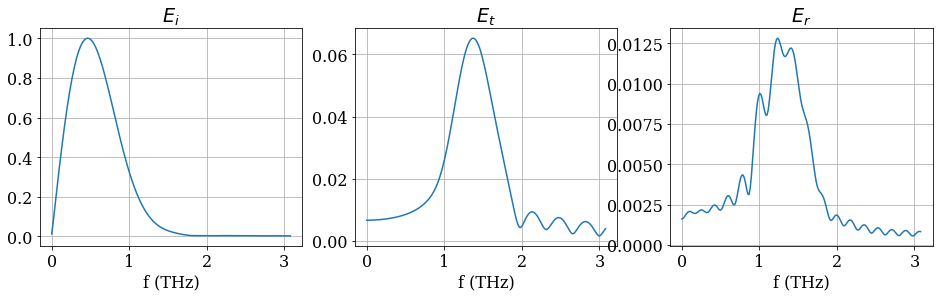

In [34]:

def Get_Temporal_Spectrum(E_t, w_max=8.0, Nw=200):
    w = np.linspace(0, w_max, Nw)
    dt = 0.01*0.95/np.sqrt(2.0)

    Nt = len(E_t)
    t = np.linspace(0, Nt*dt, Nt)

    E_f = np.zeros(Nw, dtype=complex)

    for i in range(len(w)):
        w_i = w[i]
        E_f[i] = np.sum(E_t * np.exp(-1j*w_i*t))/Nt
    return w, E_f

plt.subplot(131)
w, Ei_f = Get_Temporal_Spectrum(Ei_t)
plot(w, np.abs(Ei_f))
plt.subplot(132)
w, Et_f = Get_Temporal_Spectrum(Et_t)
plot(w, np.abs(Et_f))
plt.subplot(133)
w, Er_f = Get_Temporal_Spectrum(Er_t)
plot(w, np.abs(Er_f))
show()

Ei_f_max = np.max(np.abs(Ei_f))

from scipy import constants
pitch = 124
plt.subplot(131)
plot(w*(constants.c/(pitch*constants.micro))/constants.tera/(2.0*np.pi), np.abs(Ei_f)/Ei_f_max)
xlabel('f (THz)')
title('$E_i$')
grid()
plt.subplot(132)
plot(w*(constants.c/(pitch*constants.micro))/constants.tera/(2.0*np.pi), np.abs(Et_f)/Ei_f_max)
xlabel('f (THz)')
title('$E_t$')
grid()
plt.subplot(133)
plot(w*(constants.c/(pitch*constants.micro))/constants.tera/(2.0*np.pi), np.abs(Er_f)/Ei_f_max)
xlabel('f (THz)')
title('$E_r$')
grid()
savefig(folder + 'E-irt-spectrum.png', bbox_inches='tight', pad_inches=0.5)
show()
